In [22]:
import os
import numpy as np
import sys
sys.path.insert(0, '/home/120/em8117/BayesHI')
import bayeshi
import matplotlib.pyplot as plt

In [23]:
model = bayeshi.load_model('simpleBNN', cnn_blocks = 1, prior_mu = 0.0, prior_sigma = 0.01)

In [24]:
train_loader, val_loader, test_loader = bayeshi.load_tigress_data(sim_number= '300', num_workers=2)

Loading data for simulation 300
Removed 0 lines of sight with NaNs
Splitting data into train, validation, and test sets with sizes: train=60%, val=20%, test=20%


In [25]:
# Get the initial sigmas for the kernels and show
initial_sigmas = np.exp(model._modules['conv_layers']._modules['0']._parameters['weight_log_sigma'].detach().cpu().numpy())

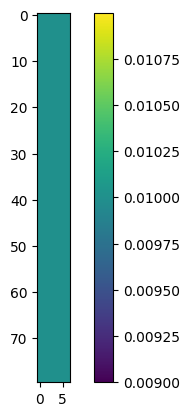

In [29]:
plt.imshow(initial_sigmas.reshape(80,7))
plt.colorbar()

In [32]:
iteration_epochs = 50

updated_sigmas = []

for i in range(iteration_epochs):
    print(f'Epoch {i+1}')
    _, _, _, _ = model.fit(train_loader, val_loader, None, nEpochs=1)
    new_sigmas = np.exp(model._modules['conv_layers']._modules['0']._parameters['weight_log_sigma'].detach().cpu().numpy())
    updated_sigmas.append(new_sigmas.reshape(80,7))

updated_sigmas = np.array(updated_sigmas)

Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0752, Validation Loss: 0.0087, took 64.34s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0136, Validation Loss: 0.0067, took 64.01s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0080, Validation Loss: 0.0055, took 63.89s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0068, Validation Loss: 0.0056, took 64.02s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0062, Validation Loss: 0.0052, took 63.88s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0059, Validation Loss: 0.0061, took 63.92s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0058, Validation Loss: 0.0063, took 63.89s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0.0056, Validation Loss: 0.0053, took 64.00s
Training Model
Initial learning rate: [0.001]
Epoch [1/1], Train Loss: 0

In [33]:
updated_sigmas.shape

(50, 80, 7)

In [34]:
# Save!
np.save("sigma_evolution.npy", updated_sigmas)

In [36]:
# Load from file
sigma_evolution = np.load("sigma_evolution.npy")

In [37]:
sigma_evolution.shape

(50, 80, 7)

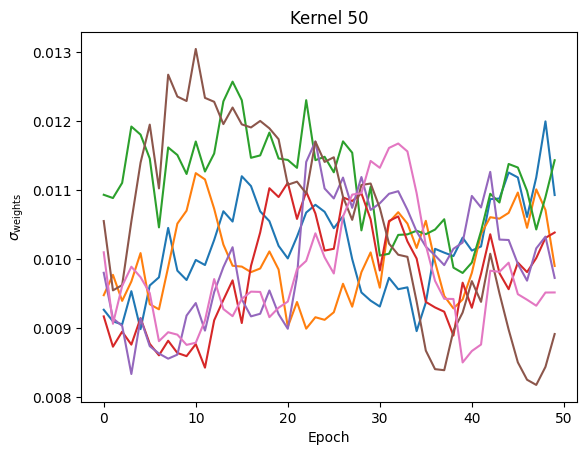

In [68]:
kernel = 49
plt.plot(sigma_evolution[:,kernel,:])
plt.title(f'Kernel {kernel+1}')
plt.xlabel('Epoch')
plt.ylabel(r'$\sigma_\text{weights}$')
plt.show()

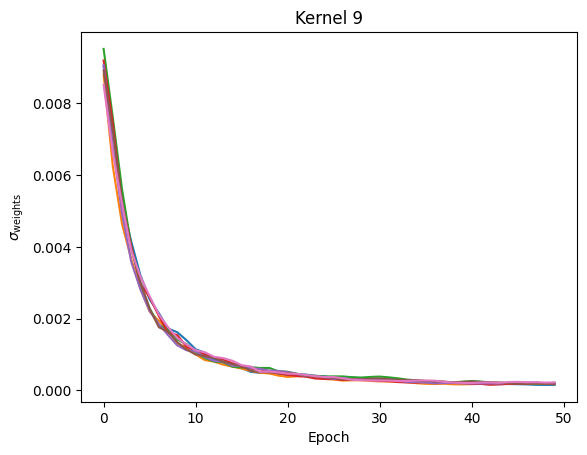

In [69]:
kernel = 8
plt.plot(sigma_evolution[:,kernel,:])
plt.title(f'Kernel {kernel+1}')
plt.xlabel('Epoch')
plt.ylabel(r'$\sigma_\text{weights}$')
plt.show()